<a href="https://colab.research.google.com/github/AlbertoASandoval/Descenso_de_gradiente_-practica-/blob/main/02%20Descenso_de_gradiente_(practica).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ejercicio de Desenso de Gradiente

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 10)

import plotly.express as px

In [ ]:
import os

# Batch Gradient Descent

Trabajaremos un problema de [regresión lineal](https://github.com/scidatmath2020/Machine-Learning/blob/main/C01.2%20Regresi%C3%B3n%20lineal.ipynb)

Básicamente, $\beta_1$ y $\beta_2$ son los coeficientes que queremos encontrar tales que se minimice la función de coste $$L(\beta_1,\beta_2)=\frac{1}{2m}\sum_{j=1}^m(\beta_1x_{j1}+\beta_2x_{j2}-y_j)^2$$ por lo que $$\nabla(L(\beta_1,\beta_2))=\frac{1}{m}\sum_{j=1}^n(\hat{y_j}-y_j)\cdot x_j,$$ siendo $\hat{y_j}=\beta_1x_{j1}+\beta_2x_{j2}$

- para leer desde spyder

Lo bueno de usar este dataset es que sabemos exactamente cuales son los coeficientes $\beta_i$ que definen el modelo lineal que genera la variable objetivo

In [ ]:


Tabla = pd.read_csv('C03_tabla.csv', delimiter=",")


In [ ]:
Tabla = np.genfromtxt("C03_tabla.csv",delimiter=",")
coeficientes_objetivo = np.genfromtxt("C03_coeficientes_objetivo.csv",delimiter=",")

In [ ]:
Tabla

array([[ 9.10179062e-01,  2.14005419e+00,  1.26973378e+02],
       [ 2.28816312e-01,  9.11275610e-01,  5.09479533e+01],
       [ 2.81073722e-01,  1.03840798e-01,  1.08166039e+01],
       ...,
       [ 2.12420235e-01, -1.49493379e+00, -7.20286155e+01],
       [ 2.18427364e-01,  1.54907383e+00,  8.32549917e+01],
       [ 7.90160176e-01,  1.07008303e+00,  7.00740524e+01]])

In [ ]:
df = pd.DataFrame(Tabla)
df.columns = ["x1","x2","y"]
df

,x1,x2,y
0,0.910179,2.140054,126.973378
1,0.228816,0.911276,50.947953
2,0.281074,0.103841,10.816604
3,0.000368,-0.880775,-44.889480
4,-0.695574,2.556804,116.661998
...,...,...,...
995,2.040157,0.123666,46.395152
996,-0.138078,0.748438,35.437537
997,0.212420,-1.494934,-72.028616
998,0.218427,1.549074,83.254992


In [ ]:
fig = px.scatter_3d(df, x='x1', y='x2', z='y')
fig.show()

In [ ]:
coeficientes_objetivo

array([19.65111583, 50.97410374])

In [ ]:
X = Tabla[:,0:2]
y = Tabla[:,2]

In [ ]:
X

array([[ 0.91017906,  2.14005419],
       [ 0.22881631,  0.91127561],
       [ 0.28107372,  0.1038408 ],
       ...,
       [ 0.21242023, -1.49493379],
       [ 0.21842736,  1.54907383],
       [ 0.79016018,  1.07008303]])

In [ ]:
y

array([ 1.26973378e+02,  5.09479533e+01,  1.08166039e+01, -4.48894802e+01,
        1.16661998e+02,  2.82090834e+01,  1.75443254e+01, -6.42952620e-03,
        2.14088126e+01, -4.05439567e+01,  5.05845474e+01,  4.62954954e+01,
        4.49414786e+01, -2.12155062e+01, -2.68189376e+01, -4.85781585e+01,
       -6.39218250e+01, -4.25979302e+01,  8.39844893e+00,  3.57369051e+01,
       -1.91045002e+01, -3.78361197e+01,  3.83654115e+01, -6.22186313e+01,
        4.22520107e+01, -4.27989522e+01, -2.13007061e+01,  9.84599413e+01,
        8.64899108e+01,  5.96541107e+01,  6.15324351e+01, -2.20413285e+01,
       -1.85455208e+01, -8.36776563e+01, -4.00759302e+01, -6.96799341e+01,
       -8.53114254e+01, -7.68634556e+01,  8.25187905e+01,  2.02065739e+01,
       -7.96249305e+00,  2.36611454e-01,  8.19009728e+01,  1.20200828e+02,
       -2.36354110e+01, -2.91808750e+01, -1.55322951e+02, -8.35803016e+01,
       -4.22082435e+01,  8.26645069e+00,  4.84178752e+01,  6.38377041e+01,
       -1.50324972e+00,  

Podemos obtener la variable objetivo mediante un producto escalar de los pesos con las variables independientes

In [ ]:
def predecir_batch(coeficientes, X):
    return coeficientes @ X.T

In [ ]:
coeficientes_objetivo

array([19.65111583, 50.97410374])

In [ ]:
y_predicciones = predecir_batch(coeficientes_objetivo, X)
y_predicciones[:10]

array([ 1.26973378e+02,  5.09479533e+01,  1.08166039e+01, -4.48894802e+01,
        1.16661998e+02,  2.82090834e+01,  1.75443254e+01, -6.42952620e-03,
        2.14088126e+01, -4.05439567e+01])

In [ ]:
y_predicciones

array([ 1.26973378e+02,  5.09479533e+01,  1.08166039e+01, -4.48894802e+01,
        1.16661998e+02,  2.82090834e+01,  1.75443254e+01, -6.42952620e-03,
        2.14088126e+01, -4.05439567e+01,  5.05845474e+01,  4.62954954e+01,
        4.49414786e+01, -2.12155062e+01, -2.68189376e+01, -4.85781585e+01,
       -6.39218250e+01, -4.25979302e+01,  8.39844893e+00,  3.57369051e+01,
       -1.91045002e+01, -3.78361197e+01,  3.83654115e+01, -6.22186313e+01,
        4.22520107e+01, -4.27989522e+01, -2.13007061e+01,  9.84599413e+01,
        8.64899108e+01,  5.96541107e+01,  6.15324351e+01, -2.20413285e+01,
       -1.85455208e+01, -8.36776563e+01, -4.00759302e+01, -6.96799341e+01,
       -8.53114254e+01, -7.68634556e+01,  8.25187905e+01,  2.02065739e+01,
       -7.96249305e+00,  2.36611454e-01,  8.19009728e+01,  1.20200828e+02,
       -2.36354110e+01, -2.91808750e+01, -1.55322951e+02, -8.35803016e+01,
       -4.22082435e+01,  8.26645069e+00,  4.84178752e+01,  6.38377041e+01,
       -1.50324972e+00,  

Comprobamos que dichas predicciones son exactamente iguales que la variable objetivo

In [ ]:
y_predicciones[:10]-y[:10]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  4.42354486e-17,
       -3.55271368e-15,  0.00000000e+00])

Necesitamos una función de error, en este caso usaremos el **Error Cuadrático Medio** dividido entre 2, para que su derivada no tenga el 2

In [ ]:
def error_batch(y_pred, y_true):
    m = y_pred.shape[0]
    return (np.sum(y_pred - y_true)**2)/(2*m)

También necesitamos la derivada de la función de error.

In [ ]:
def derivada_error_batch(y_pred, y_true, x):
    m = y_pred.shape[0]
    return np.sum((y_pred - y_true)*x/m)

Para empezar el proceso generamos los coeficientes iniciales al azar

In [ ]:
coeficientes = np.random.random((X.shape[1],))
coeficientes

array([0.51841407, 0.17793538])

In [ ]:
coeficientes_objetivo

array([19.65111583, 50.97410374])

Ahora podemos predecir y calcular el error y la derivada del error

In [ ]:
y_pred = predecir_batch(coeficientes, X)

In [ ]:
error_batch(y_pred, y)

600.6756128162667

In [ ]:
derivada_error_batch(y_pred, y, X[:,0])

-17.257788052181525

ya tenemos todo para implementar el descenso de gradiente batch

In [ ]:
def descenso_gradiente_batch(coeficientes, X, y):
    y_predicciones = predecir_batch(coeficientes, X)
    for i in range(coeficientes.shape[0]):
        coeficientes[i] = coeficientes[i]- STEP_SIZE * derivada_error_batch(y_predicciones, y, X[:,i])
    error = error_batch(y_predicciones, y)
    return coeficientes, error


Simplemente definimos un número de iteraciones y un tamaño de paso (tambien llamado **ratio de aprendizaje o learning rate**), iteraremos y en cada iteración modificaremos los parámetros del modelo en función del tamaño de paso.

In [ ]:
coeficientes_iteraciones = []
error_iteraciones = []

N_ITERACIONES = 200
STEP_SIZE = 0.02
coeficientes = np.random.random((X.shape[1],))
error = error_batch(coeficientes, X)
for i in range(N_ITERACIONES):
    coeficientes_iteraciones.append(coeficientes.copy())
    error_iteraciones.append(error)
    coeficientes, error = descenso_gradiente_batch(coeficientes, X, y)

coeficientes_iteraciones = np.array(coeficientes_iteraciones)

In [ ]:
coeficientes

array([19.14723921, 49.92492068])

Vemos que los coeficientes obtenidos se parecen mucho a los coeficientes objetivo.

In [ ]:
coeficientes_objetivo

array([19.65111583, 50.97410374])

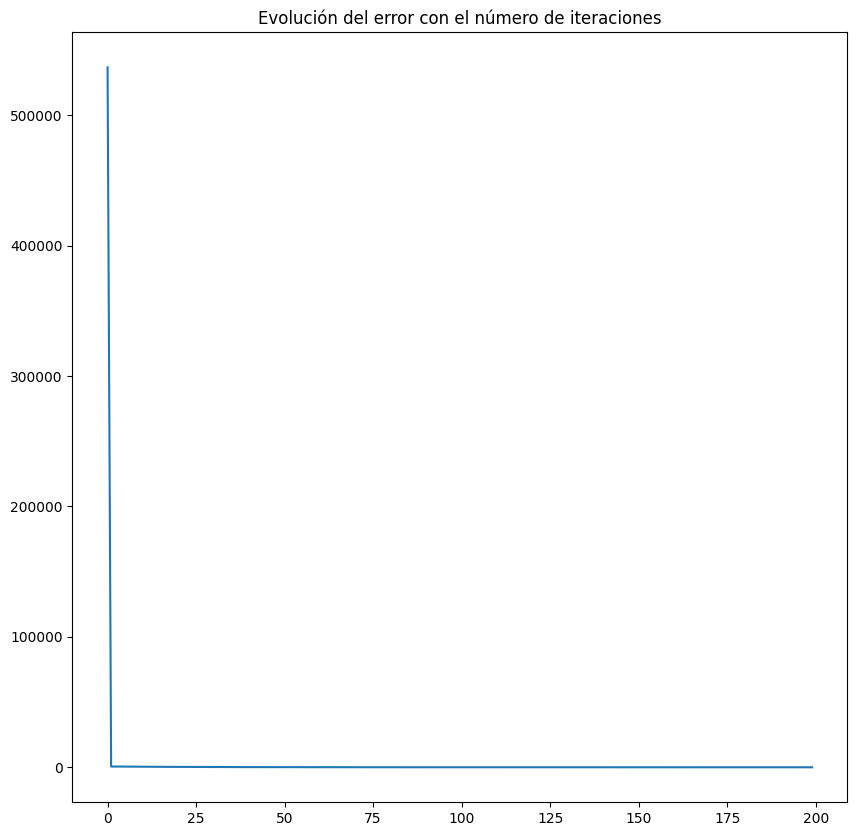

In [ ]:
plt.plot(error_iteraciones)
plt.title("Evolución del error con el número de iteraciones");

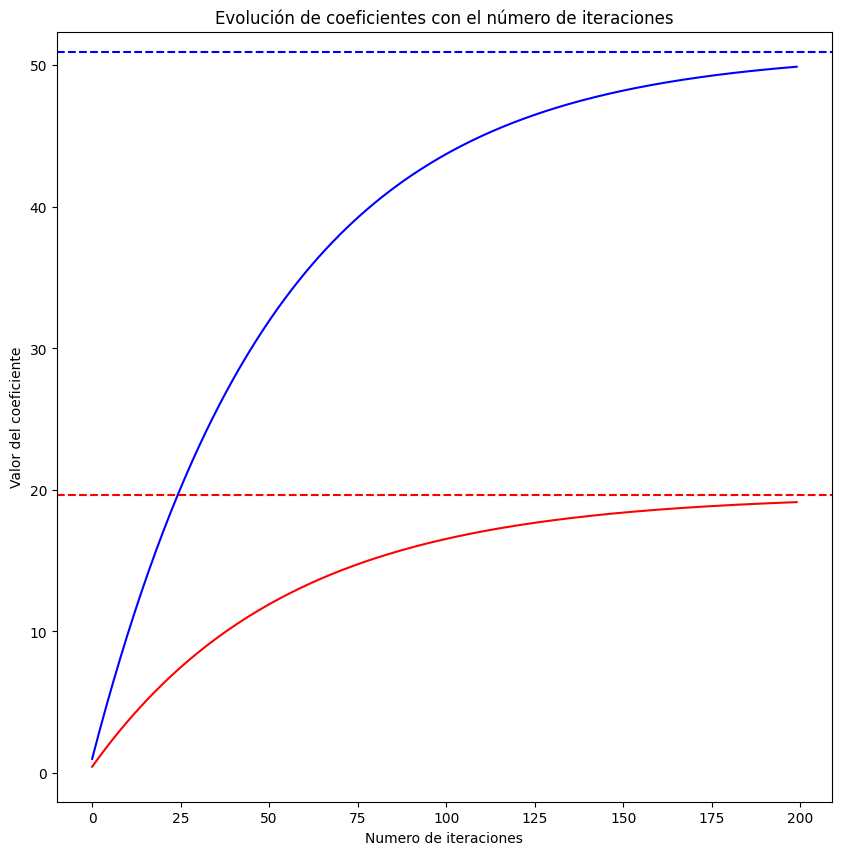

In [ ]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de iteraciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolución de coeficientes con el número de iteraciones");

# Descenso de gradiente estocástico (SGD)

In [ ]:
coeficientes = np.random.random((X.shape[1],))
coeficientes

array([0.61215903, 0.82035638])

In [ ]:
def predecir_observacion(coeficientes, x):
    return coeficientes @ x.T

In [ ]:
predecir_observacion(coeficientes, X[0])

In [ ]:
def derivada_error_observacion(y_pred, y_true, x):
    return (y_pred - y_true) * x

In [ ]:
derivada_error_observacion(predecir_observacion(coeficientes, X[0]), y[0], X[0])

la definición de la iteracion de sgd es similar a la de batch, simplemente usando el error de observación en vez de el error total

In [ ]:
def descenso_gradiente_estocastico(coeficientes, x, y):
    y_predicciones = predecir_observacion(coeficientes, x)
    for i in range(coeficientes.shape[0]):
        coeficientes[i] = coeficientes[i]- STEP_SIZE * derivada_error_observacion(y_predicciones, y, x[i])
    return coeficientes

Ahora hacemos solo una iteración (podriamos hacer más), pero la iteramos para cada observación individual.

In [ ]:
coeficientes_iteraciones = []
error_iteraciones = []

STEP_SIZE = 0.02
coeficientes = np.random.random((X.shape[1],))
error = error_batch(coeficientes, X)

indice_aleatorio = np.random.permutation(X.shape[0])
for i in indice_aleatorio:
    error_iteraciones.append(error)
    coeficientes_iteraciones.append(coeficientes.copy())

    x_iteracion = X[i]
    y_iteracion = y[i]
    coeficientes = descenso_gradiente_estocastico(coeficientes,
                                                  x_iteracion,
                                                  y_iteracion)
    y_predicciones = predecir_batch(coeficientes, X)
    error = error_batch(y_predicciones, y)

coeficientes_iteraciones = np.array(coeficientes_iteraciones)

In [ ]:
coeficientes

In [ ]:
coeficientes_objetivo

In [ ]:
plt.plot(error_iteraciones)
plt.title("Evolución del error con el número de iteraciones");

In [ ]:
plt.plot(coeficientes_iteraciones[:,0], color="red")
plt.axhline(coeficientes_objetivo[0], color="red", linestyle="dashed")

plt.plot(coeficientes_iteraciones[:,1], color="blue")
plt.axhline(coeficientes_objetivo[1], color="blue", linestyle="dashed")

plt.xlabel("Numero de observaciones")
plt.ylabel("Valor del coeficiente")

plt.title("Evolución de coeficientes en SGD con el número de observaciones iteradas");

### SGD en scikit-learn

Scikit-learn tiene estimadores para regresión y clasificación basados en SGD, [SGDRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html#sklearn.linear_model.SGDRegressor) y [SGDClassifier](from sklearn.linear_model import SGDClassifier)

Los parámetros más importantes para estos estimadores son:

- **loss**: La función de pérdidas a utilizar
- **learning_rate**: El tamaño de paso, también llamado learning rate (ratio de aprendizaje)
- **max_iter**: Número de iteraciones (también llamadas épocas)

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
estimador_sgd = SGDRegressor(max_iter=10)
estimador_sgd.fit(X, y)

In [ ]:
estimador_sgd.predict(X)[:10]

Podemos ver los coeficientes que produce el estimador

In [ ]:
estimador_sgd.coef_

Y vemos que son muy similares a los coeficientes objetivo

In [ ]:
coeficientes_objetivo